数据来源：Center for Machine Learning and Intelligent Systems发布的美国130家医院关于糖尿病的10年临床护理数据https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

In [1]:
import pandas as pd 

# 数据文件读取
data = pd.read_csv('diabetic_data.csv',encoding='gb18030', engine = 'python')
print('The shape is: ',data.shape)
data.head()

The shape is:  (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


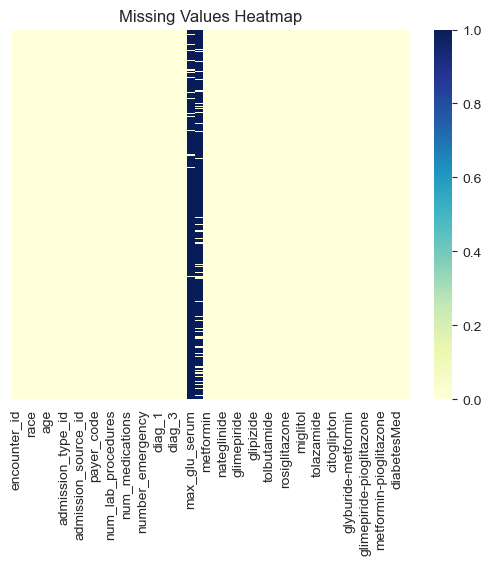

encounter_id                  0.0%
patient_nbr                   0.0%
race                          0.0%
gender                        0.0%
age                           0.0%
weight                        0.0%
admission_type_id             0.0%
discharge_disposition_id      0.0%
admission_source_id           0.0%
time_in_hospital              0.0%
payer_code                    0.0%
medical_specialty             0.0%
num_lab_procedures            0.0%
num_procedures                0.0%
num_medications               0.0%
number_outpatient             0.0%
number_emergency              0.0%
number_inpatient              0.0%
diag_1                        0.0%
diag_2                        0.0%
diag_3                        0.0%
number_diagnoses              0.0%
max_glu_serum               94.75%
A1Cresult                   83.28%
metformin                     0.0%
repaglinide                   0.0%
nateglinide                   0.0%
chlorpropamide                0.0%
glimepiride         

In [2]:
#缺失值处理

#绘制热图，可视化数据集中的缺失值。
#若为缺失值，则为True，颜色为深蓝色。
import seaborn as sns
import matplotlib.pyplot as plt

# 可视化缺失值
sns.heatmap(data.isnull(), cmap="YlGnBu", cbar=True, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

#统计缺失率
count_missing = data.apply(lambda x:'{}%'.format(round(100*sum(x.isnull())/len(x),2)))
print(count_missing)

In [3]:
#删除缺失率高的列（max_glu_serum，A1Cresult）
columns_to_drop = ['max_glu_serum','A1Cresult']  
data.drop(columns=columns_to_drop, inplace=True)

print('The shape is: ',data.shape)
data.head()

The shape is:  (101766, 48)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#查看唯一值
for col in data.columns:
    print(col, ' : ')
    print(data[col].unique(),'\n')

encounter_id  : 
[  2278392    149190     64410 ... 443854148 443857166 443867222] 

patient_nbr  : 
[  8222157  55629189  86047875 ... 140199494 120975314 175429310] 

race  : 
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] 

gender  : 
['Female' 'Male' 'Unknown/Invalid'] 

age  : 
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] 

weight  : 
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] 

admission_type_id  : 
[6 1 2 3 4 5 8 7] 

discharge_disposition_id  : 
[25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] 

admission_source_id  : 
[ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13] 

time_in_hospital  : 
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14] 

payer_code  : 
['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR'] 

medical_specialty  : 
['Pediatrics-Endocrinology' '?' 'InternalMedicine

In [5]:
#删除仅有一个属性值的列
data = data.drop(columns=['examide', 'citoglipton'])

print('The shape is: ',data.shape)
data.head()

The shape is:  (101766, 46)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


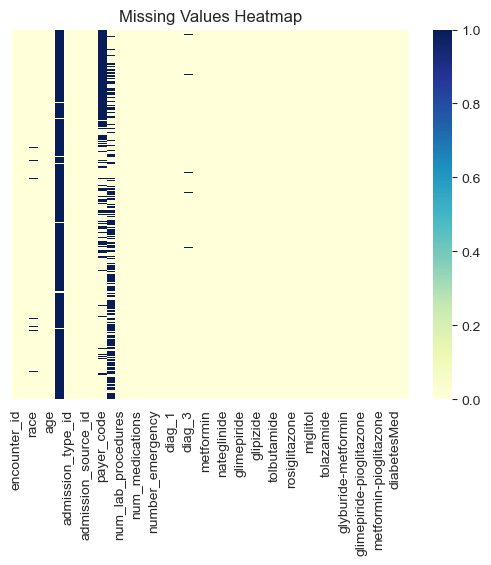

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [6]:
import numpy as np

# 将 '?' 和 'Unknown/Invalid' 替换为 NaN
data.replace({'?': np.nan, 'Unknown/Invalid': np.nan}, inplace=True)

# 可视化缺失值
sns.heatmap(data.isnull(), cmap="YlGnBu", cbar=True, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

# 统计缺失量
count_missing = data.apply(lambda x: sum(x.isnull()))
print(count_missing)

In [7]:
#删除缺失率较高的列
data = data.drop(columns=['weight', 'payer_code','medical_specialty'])
#删除重复诊断数据
data = data.drop(columns=['diag_2','diag_3'])
#删除无意义的encounter_id列
data = data.drop(columns=['encounter_id'])
#删除存在缺失值的条目
data.dropna(subset=['race', 'gender','diag_1'], inplace=True)

print('The shape is: ',data.shape)
data.head()

The shape is:  (99473, 40)


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


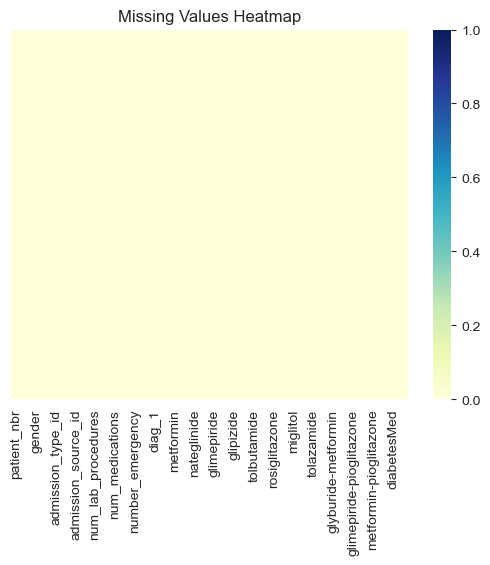

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-

In [8]:
# 可视化缺失值
sns.heatmap(data.isnull(), cmap="YlGnBu", cbar=True, yticklabels=False, vmin=0, vmax=1)
plt.title('Missing Values Heatmap')
plt.show()

# 统计缺失量
count_missing = data.apply(lambda x: sum(x.isnull()))
print(count_missing)
#缺失值处理完成

In [9]:
data['service_utilization'] = data['number_outpatient'] + data['number_emergency'] + data['number_inpatient']
data.drop(['number_outpatient','number_emergency','number_inpatient'], axis=1,inplace=True)

In [10]:
data['readmitted'] = data['readmitted'].apply(lambda x : 'YES' if(x == '<30') else 'NO')

In [11]:
columns_to_replace = ['glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone']
# 替换值
for column in columns_to_replace:
    if column in data.columns:
        data[column] = data[column].replace('Steady', 'Yes')


In [12]:
#数据去重
#保留每个patient_nbr列中第一次出现的值
data = data.drop_duplicates(subset= ['patient_nbr'], keep = 'first')
print('The shape is: ',data.shape)
data.head()

The shape is:  (69658, 38)


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,NO,0
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,Up,No,No,No,No,No,Ch,Yes,NO,0
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,Yes,NO,3
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [13]:
data.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,service_utilization
count,6.965800e+04,69658.000000,69658.000000,69658.000000,69658.000000,69658.000000,69658.000000,69658.000000,69658.000000,69658.000000
mean,5.529432e+07,2.104798,3.619785,5.677625,4.290735,43.048595,1.431192,15.702518,7.262296,0.570229
std,3.942683e+07,1.515182,5.302499,4.174951,2.949932,19.980651,1.757278,8.300869,1.988434,1.443456
min,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.343315e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,6.000000,0.000000
50%,4.917564e+07,1.000000,1.000000,7.000000,3.000000,44.000000,1.000000,14.000000,8.000000,0.000000
75%,8.777203e+07,3.000000,3.000000,7.000000,6.000000,57.000000,2.000000,20.000000,9.000000,1.000000
max,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,16.000000,49.000000


In [14]:
#标签编码
from sklearn.preprocessing import LabelEncoder

# 指定需要进行标签编码的列
categorical_columns = ['race', 'gender', 'age', 'diag_1', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'service_utilization']

# 创建标签编码器
label_encoder = LabelEncoder()

# 批量进行标签编码
for column in categorical_columns:
    if column in data.columns:
        # 只对存在的列进行标签编码
        data[column] = label_encoder.fit_transform(data[column])


In [15]:
data.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization
0,8222157,2,0,0,6,25,1,1,41,0,...,1,1,0,0,0,0,1,0,0,0
1,55629189,2,0,1,1,1,7,3,59,0,...,3,1,0,0,0,0,0,1,0,0
2,86047875,0,0,2,1,1,7,2,11,5,...,1,1,0,0,0,0,1,1,0,3
3,82442376,2,1,3,1,1,7,2,44,1,...,3,1,0,0,0,0,0,1,0,0
4,42519267,2,1,4,1,1,7,1,51,0,...,2,1,0,0,0,0,0,1,0,0


In [16]:
#离群点检测
#创建一个函数检测和去除离群点
def remove_outliers_iqr_adjusted(df, columns, iqr_multiplier):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # 调整的离群点阈值
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # 去除离群点
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
#使用四分位数（Q1 和 Q3）计算四分位间距（IQR），并根据 IQR 计算出上下限。超出这个范围的值被认为是离群值。


In [17]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
# 选择要检测的特征
columns_to_check = [
    'time_in_hospital', 'num_lab_procedures', 'num_procedures',
    'num_medications', 'number_diagnoses','service_utilization'
]
# 去除离群点
cleaned_data_adjusted = remove_outliers_iqr_adjusted(data.copy(), columns_to_check, iqr_multiplier=2)

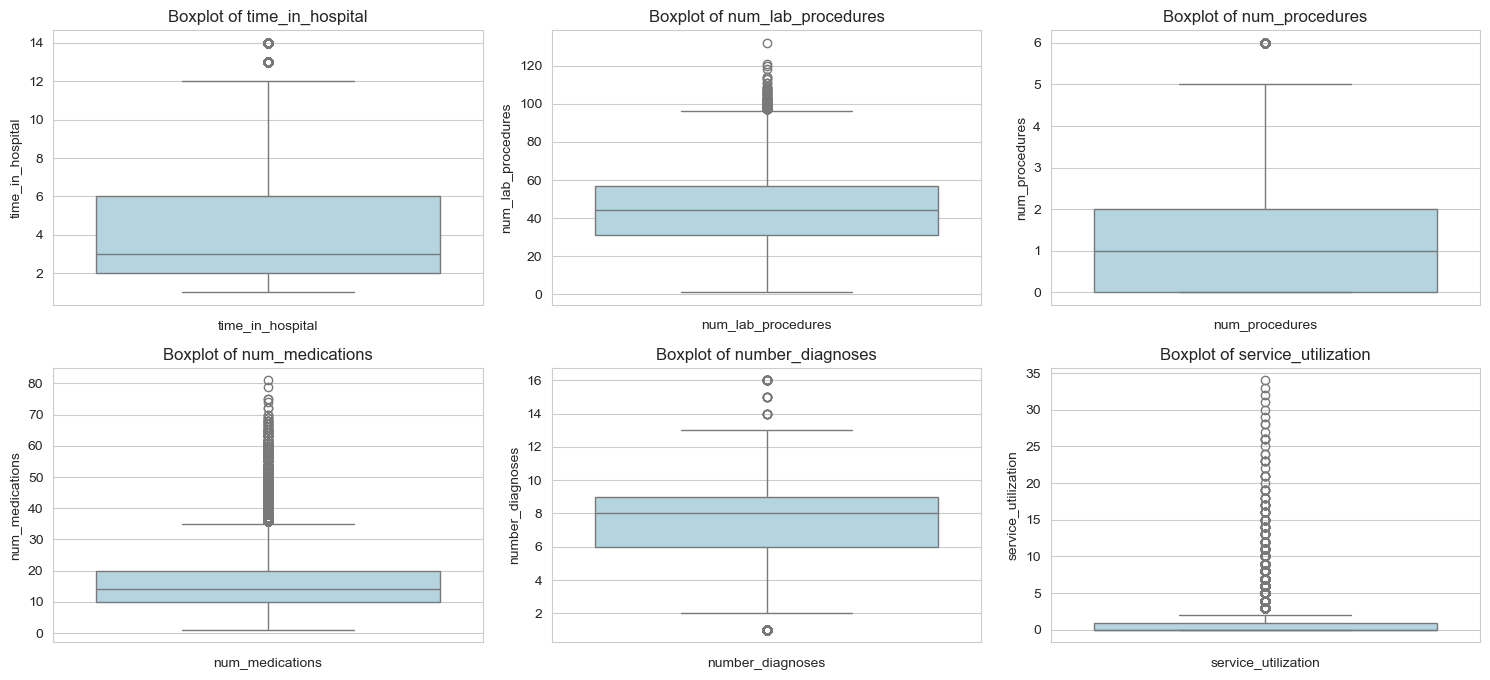

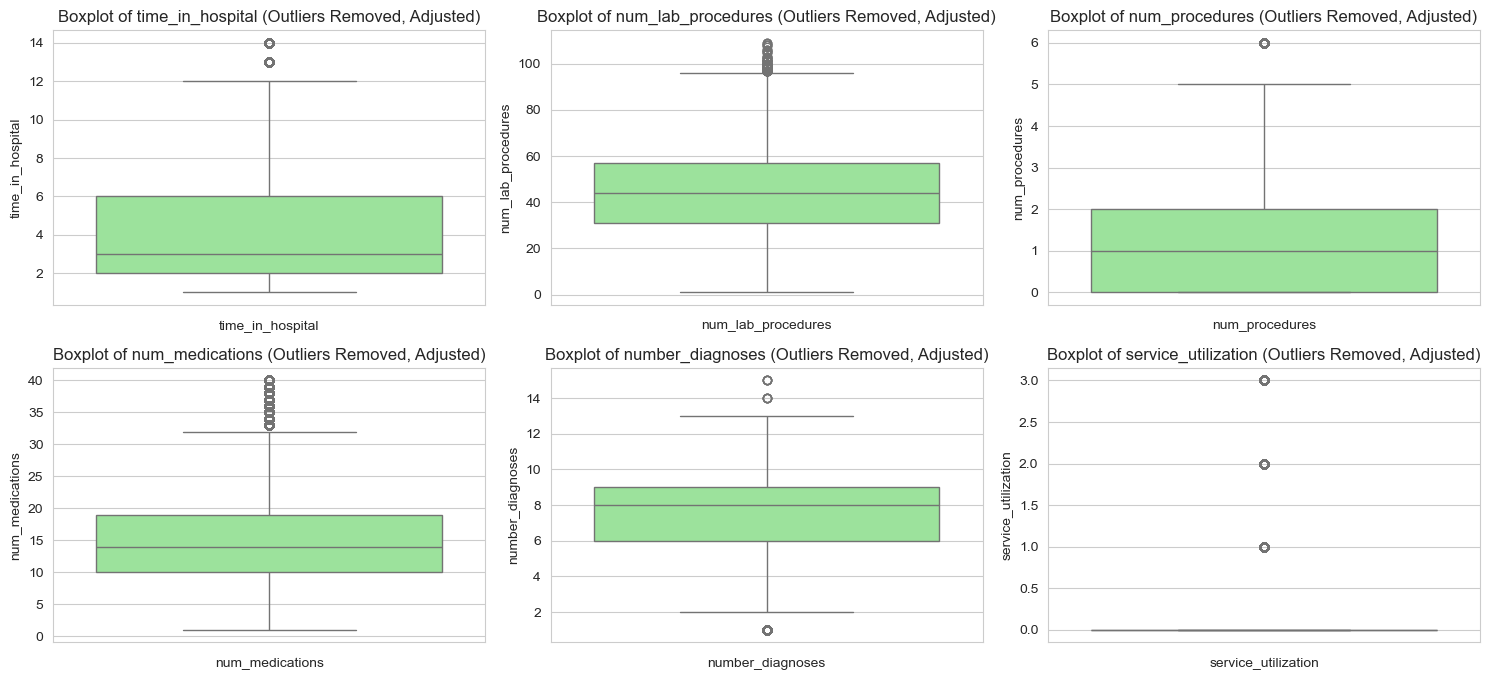

In [18]:
# 可视化原始数据
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=data[column], color='lightblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# 可视化去除离群点后的数据
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=cleaned_data_adjusted[column], color='lightgreen')
    plt.title(f'Boxplot of {column} (Outliers Removed, Adjusted)')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


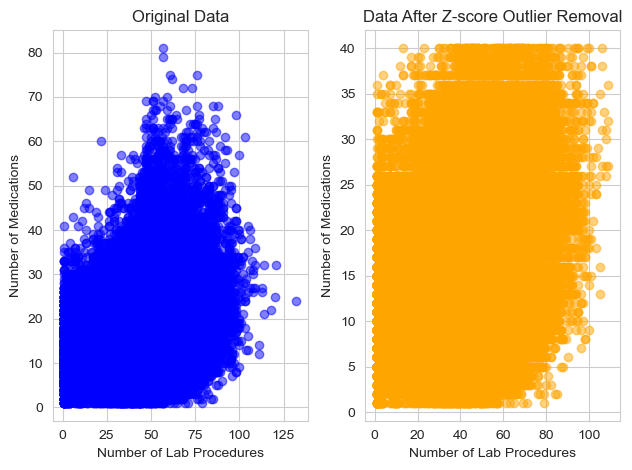

In [19]:
# 原始数据可视化
plt.subplot(1, 2, 1)
plt.scatter(data['num_lab_procedures'], data['num_medications'], color='blue', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')
plt.grid(True)

# 去除离群点后的数据可视化
plt.subplot(1, 2, 2)
plt.scatter(cleaned_data_adjusted['num_lab_procedures'], cleaned_data_adjusted['num_medications'], color='orange', alpha=0.5)
plt.title('Data After Z-score Outlier Removal')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
print(f"原始数据集大小: {data.shape}")
print(f"去除离群点后的数据集大小: {cleaned_data_adjusted.shape}")

cleaned_data_adjusted.head()

原始数据集大小: (69658, 38)
去除离群点后的数据集大小: (65914, 38)


,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,service_utilization
0,8222157,2,0,0,6,25,1,1,41,0,...,1,1,0,0,0,0,1,0,0,0
1,55629189,2,0,1,1,1,7,3,59,0,...,3,1,0,0,0,0,0,1,0,0
2,86047875,0,0,2,1,1,7,2,11,5,...,1,1,0,0,0,0,1,1,0,3
3,82442376,2,1,3,1,1,7,2,44,1,...,3,1,0,0,0,0,0,1,0,0
4,42519267,2,1,4,1,1,7,1,51,0,...,2,1,0,0,0,0,0,1,0,0


聚类

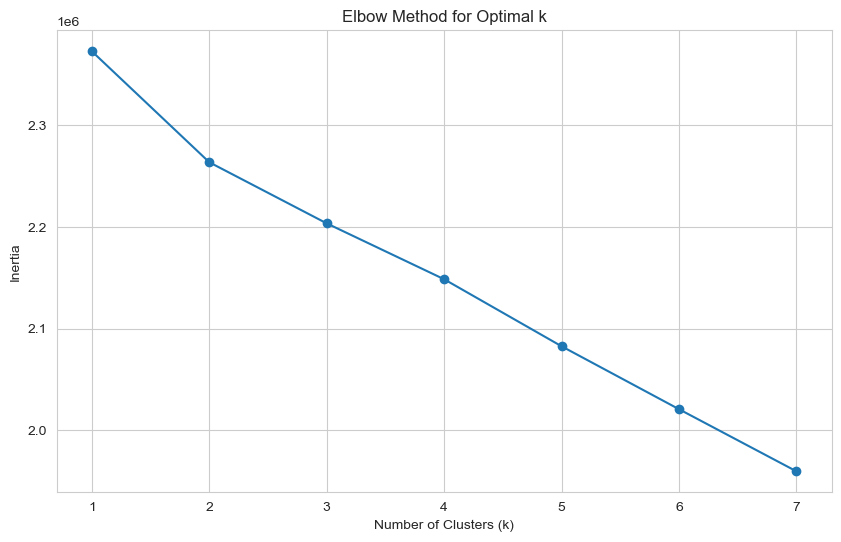

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 使用所有特征进行聚类
features_to_cluster = cleaned_data_adjusted.copy()

# 标准化特征
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_cluster)

# 使用肘部法则 (Elbow Method)选择聚类的数量 (k)
inertia = []
k_range = range(1, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

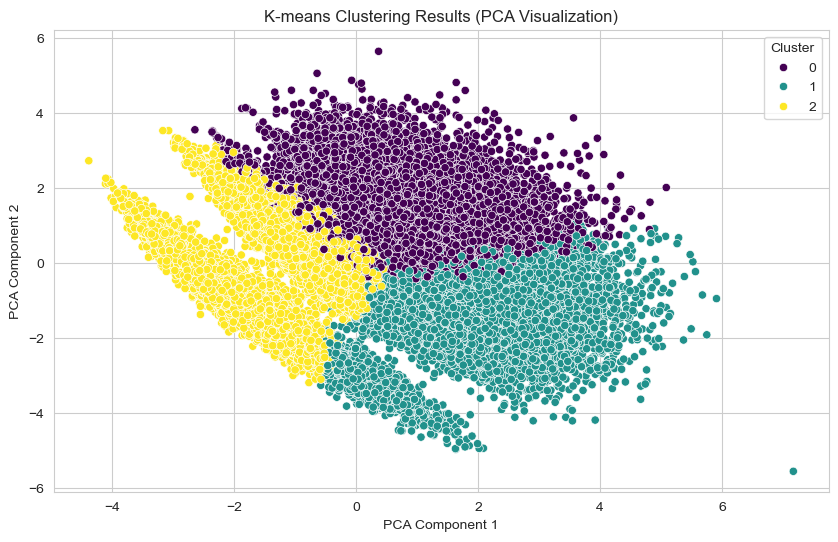

Cluster
2    29991
0    20296
1    15627
Name: count, dtype: int64


In [22]:
k = 3  # 根据肘部法则选择的聚类数
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit(scaled_features).labels_

# 将聚类结果添加到 cleaned_data_adjusted 中
cleaned_data_adjusted['Cluster'] = cluster_labels

# 可视化聚类结果
plt.figure(figsize=(10, 6))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=cleaned_data_adjusted['Cluster'], palette='viridis')
plt.title('K-means Clustering Results (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 输出每个聚类的样本数
print(cleaned_data_adjusted['Cluster'].value_counts())

聚类评价

In [23]:
from sklearn.metrics import silhouette_score
#轮廓系数
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f'轮廓系数: {silhouette_avg:.3f}')

轮廓系数: 0.066


In [24]:
# 簇间平方和BCSS
def calculate_bcss(features, cluster_labels, cluster_centers):
    overall_mean = np.mean(features, axis=0)  # 所有数据点的均值
    bcss = 0
    for i in range(len(cluster_centers)):  # 遍历每个簇
        # 选择属于当前簇的样本
        cluster_points = features[cluster_labels == i]
        # 计算每个簇的大小
        n_k = cluster_points.shape[0]
        # 计算簇的质心与总均值的距离平方
        bcss += n_k * np.sum((cluster_centers[i] - overall_mean) ** 2)
    return bcss

# 获取聚类的质心
cluster_centers = kmeans.cluster_centers_

# 计算BCSS
bcss = calculate_bcss(scaled_features, cluster_labels, cluster_centers)
print(f"簇间平方和（BCSS）：{bcss:.3f}")

簇间平方和（BCSS）：169291.605
